In [1]:
# import libraries
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

import warnings
warnings.filterwarnings("ignore")

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Read Market Data
market_df = pd.read_excel('../../data/market_data.xlsx', parse_dates = [0])

## Data preprocessing

In [3]:
# Check dtypes : No problem 
market_df.dtypes

Time (UTC+10)                                             datetime64[ns]
Regions NSW Trading Price ($/MWh)                                float64
Regions SA Trading Price ($/MWh)                                 float64
Regions TAS Trading Price ($/MWh)                                float64
Regions VIC Trading Price ($/MWh)                                float64
Regions NSW Trading Total Intermittent Generation (MW)           float64
Regions SA Trading Total Intermittent Generation (MW)            float64
Regions TAS Trading Total Intermittent Generation (MW)           float64
Regions VIC Trading Total Intermittent Generation (MW)           float64
Regions NSW Operational Demand (MW)                                int64
Regions SA Operational Demand (MW)                                 int64
Regions TAS Operational Demand (MW)                                int64
Regions VIC Operational Demand (MW)                                int64
dtype: object

In [4]:
# Check missing values : No Missing Values
market_df.isnull().values.any()

False

In [5]:
# Explore descriptive stats
market_df.describe()

,Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW)
count,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000
mean,76.490073,77.168657,64.705163,78.746880,65.665476,112.431257,103.323441,169.029236,7977.524371,1399.975905,1172.162898,5083.026018
std,206.959029,302.062059,82.680094,289.259796,55.152681,80.120747,48.436695,114.763946,1251.105505,339.076961,140.736186,862.678623
min,-139.930000,-919.780000,-844.650000,-676.370000,-1.390000,-1.790000,0.000000,-0.860000,5310.000000,300.000000,711.000000,2529.000000
25%,42.060000,39.090000,32.840000,39.010000,19.050000,44.000000,63.710000,70.080000,7068.000000,1208.000000,1068.000000,4438.000000
50%,61.130000,64.830000,55.640000,64.110000,50.870000,97.460000,98.950000,152.060000,7843.000000,1373.000000,1149.000000,4972.000000
75%,83.630000,95.020000,87.780000,94.850000,105.150000,169.900000,141.650000,257.320000,8686.000000,1571.000000,1252.000000,5585.000000
max,14700.000000,14700.000000,4551.390000,14700.000000,228.700000,334.970000,235.480000,467.480000,13835.000000,3240.000000,1724.000000,9667.000000


##### Assumption
- Trading Price can be negative
- Power Generated can be negative

In [6]:
# Look at Victoria only
victoria_df = market_df[['Time (UTC+10)', 
                     'Regions VIC Trading Price ($/MWh)',
                     'Regions VIC Trading Total Intermittent Generation (MW)',
                     'Regions VIC Operational Demand (MW)' ]]

## Correlation

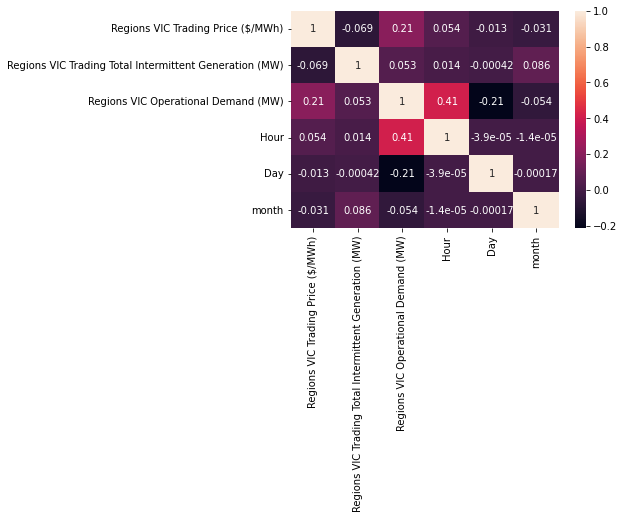

In [45]:
# Correlation : Not highly correlated between variables 
sns.heatmap(victoria_df.corr(), annot = True);
plt.savefig('../../plots/corr.png')
plt.show()

##### Comment
- There is a slight correlation between `demand` and `price`.
- Surprisingly, there is barely a correlation between `intermittent generation` and `demand` and there is no correlation between `intermittent generation` and `price`.

## Time Series Analysis

In [8]:
# Create Hour, Day and Time column
victoria_df['Time'] = victoria_df['Time (UTC+10)'].dt.time
victoria_df['Hour'] = victoria_df['Time (UTC+10)'].dt.hour
victoria_df['Day'] = victoria_df['Time (UTC+10)'].dt.dayofweek+1

### Trading Price vs other Variables

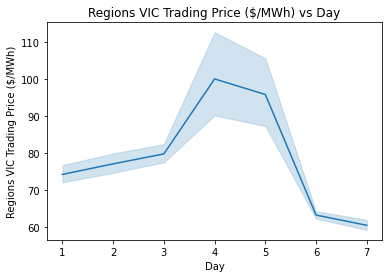

In [39]:
# Plot Trading Price vs Day 
sns.lineplot(x=victoria_df['Day'], y=victoria_df['Regions VIC Trading Price ($/MWh)'])
plt.title("Regions VIC Trading Price ($/MWh) vs Day")
plt.savefig('../../plots/price_day.png')
plt.show()

Trading price is at its lowest in the early morning, this gives us an intuition that we might want to charge our batteries during this time period.

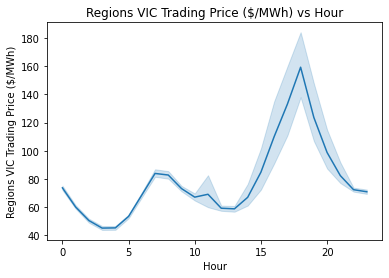

In [40]:
# Trading Price vs Hour 
sns.lineplot(x=victoria_df['Hour'], y=victoria_df['Regions VIC Trading Price ($/MWh)'])
plt.title("Regions VIC Trading Price ($/MWh) vs Hour")
plt.savefig('../../plots/price_hour.png')
plt.show()

### Intermittent Generation vs other Variables

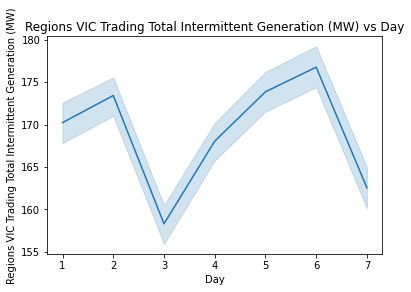

In [41]:
# Plot Intermittent Generation vs Day
sns.lineplot(x=victoria_df['Day'], y=victoria_df['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.title("Regions VIC Trading Total Intermittent Generation (MW) vs Day")
plt.savefig('../../plots/generation_day.png')
plt.show()

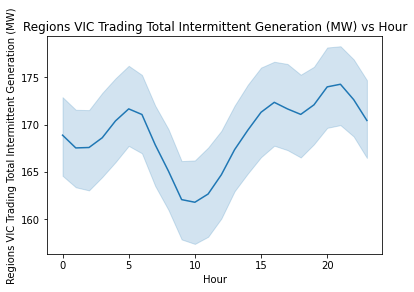

In [42]:
# Plot Intermittent Generation vs Hour
sns.lineplot(x=victoria_df['Hour'], y=victoria_df['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.title("Regions VIC Trading Total Intermittent Generation (MW) vs Hour")
plt.savefig('../../plots/generation_hour.png')
plt.show()

### Operational Demand vs other variables

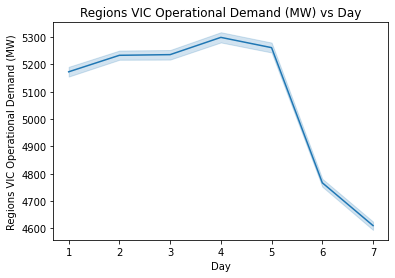

In [43]:
# Plot Operational Demand vs Day
sns.lineplot(x=victoria_df['Day'], y=victoria_df['Regions VIC Operational Demand (MW)'])
plt.title("Regions VIC Operational Demand (MW) vs Day")
plt.savefig('../../plots/demand_day.png')
plt.show()

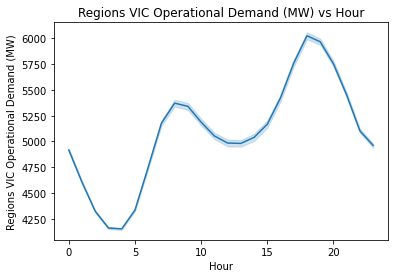

In [44]:
# Plot Operational Demand vs Hour
sns.lineplot(x=victoria_df['Hour'], y=victoria_df['Regions VIC Operational Demand (MW)'])
plt.title("Regions VIC Operational Demand (MW) vs Hour")
plt.savefig('../../plots/demand_hour.png')
plt.show()

## Season Analysis

In [15]:
vic_training = victoria_df

In [16]:
# Summer in Victoria 
vic_summer = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-01-01') &
                            (vic_training['Time (UTC+10)'] < '2018-03-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-01-01') &
                            (vic_training['Time (UTC+10)'] < '2019-03-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-01-01') &
                            (vic_training['Time (UTC+10)'] < '2020-03-01'))]

In [17]:
# Autumn in Victoria
vic_autumn = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-03-01') &
                            (vic_training['Time (UTC+10)'] < '2018-06-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-03-01') &
                            (vic_training['Time (UTC+10)'] < '2019-06-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-03-01') &
                            (vic_training['Time (UTC+10)'] < '2020-06-01'))]



In [18]:
# Winter in Victoria
vic_winter = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-06-01') &
                            (vic_training['Time (UTC+10)'] < '2018-09-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-06-01') &
                            (vic_training['Time (UTC+10)'] < '2019-09-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-06-01') &
                            (vic_training['Time (UTC+10)'] < '2020-09-01'))]

In [19]:
# Spring in Victoria
vic_spring = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-09-01') &
                            (vic_training['Time (UTC+10)'] < '2018-12-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-09-01') &
                            (vic_training['Time (UTC+10)'] < '2019-12-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-09-01') &
                            (vic_training['Time (UTC+10)'] < '2020-12-01'))]

### Total Intermittent Generation vs Hour by Season 

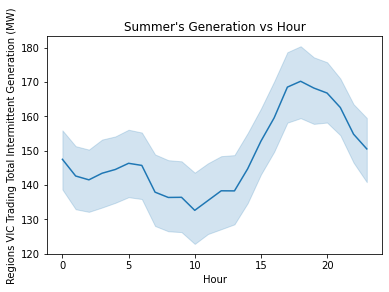

In [46]:
sns.lineplot(x=vic_summer['Hour'], y=vic_summer['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.title("Summer's Generation vs Hour")
plt.savefig('../../plots/summer_generation_hour.png')
plt.show()

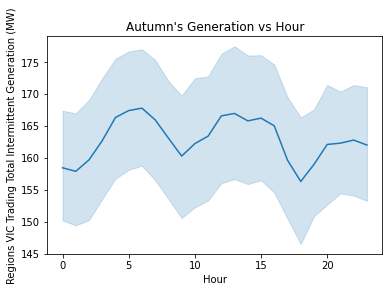

In [47]:
sns.lineplot(x=vic_autumn['Hour'], y=vic_autumn['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.title("Autumn's Generation vs Hour")
plt.savefig('../../plots/autumn_generation_hour.png')
plt.show()

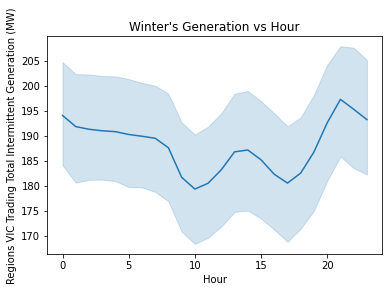

In [48]:
sns.lineplot(x=vic_winter['Hour'], y=vic_winter['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.title("Winter's Generation vs Hour")
plt.savefig('../../plots/winter_generation_hour.png')
plt.show()

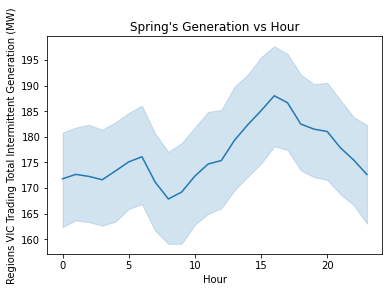

In [49]:
sns.lineplot(x=vic_spring['Hour'], y=vic_spring['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.title("Spring's Generation vs Hour")
plt.savefig('../../plots/spring_generation_hour.png')
plt.show()

#### Spring and Summer have similar patterns in terms of Total Intermittent Generation.

It is quite surprising that winter has the highest amount of Total Intermittent Generation, this is probably because winter has more winds and energy generated from wind also counts as Intermittent Generation.

In [25]:
# Create month column
victoria_df['month'] = victoria_df['Time (UTC+10)'].dt.month

In [28]:
# Add summer, autumn, winter or spring into month column
SUMMER = [12,1,2]
AUTUMN = [3,4,5]
WINTER = [6,7,8]
SPRING = [9,10,11]

for i in list(victoria_df.index):
    if ((victoria_df.at[i, 'month'] in SUMMER)):
        victoria_df.at[i,'season'] = 'summer'
    elif ((victoria_df.at[i,'month'] in AUTUMN)):
        victoria_df.at[i,'season'] = 'autumn'
    elif ((victoria_df.at[i,'month'] in WINTER)):
        victoria_df.at[i,'season'] = 'winter'
    else:
        victoria_df.at[i,'season'] = 'spring'

### Seasonal Operational Demand vs Hour / Day

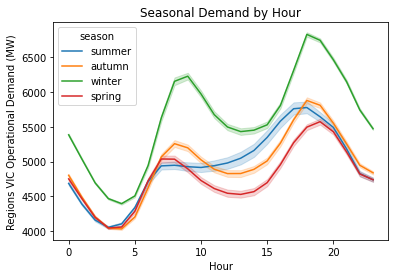

In [50]:
# Plot Seasonal Operational Demand by Hour 
sns.lineplot(x=victoria_df['Hour'], y=victoria_df['Regions VIC Operational Demand (MW)'], hue=victoria_df['season']).set_title('Seasonal Demand by Hour')
plt.savefig('../../plots/seasonaldemand_hour.png')

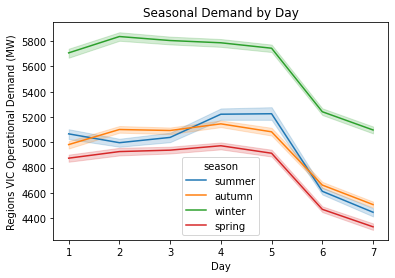

In [51]:
# Plot Seasonal Operational Demand by Day
sns.lineplot(x=victoria_df['Day'], y=victoria_df['Regions VIC Operational Demand (MW)'], hue=victoria_df['season']).set_title('Seasonal Demand by Day')
plt.savefig('../../plots/seasonaldemand_day.png')

### Seasonal Trading Price vs Hour / Day

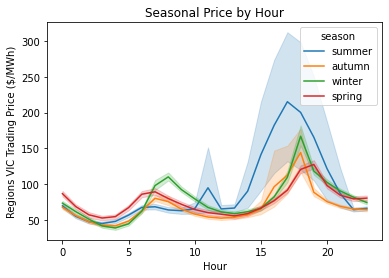

In [52]:
# Plot Seasonal Spot Price vs Hour
sns.lineplot(x=victoria_df['Hour'], y=victoria_df['Regions VIC Trading Price ($/MWh)'], hue=victoria_df['season']).set_title('Seasonal Price by Hour')
plt.savefig('../../plots/seasonalprice_hour.png')

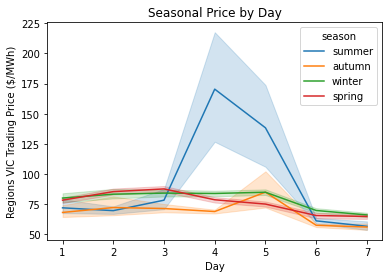

In [53]:
# Plot Seasonal Spot Price vs Day
sns.lineplot(x=victoria_df['Day'], y=victoria_df['Regions VIC Trading Price ($/MWh)'], hue=victoria_df['season']).set_title('Seasonal Price by Day')
plt.savefig('../../plots/seasonaldemand_day.png')

### Algorithm 1

In [29]:
BATTERY_POWER = 300
BATTERY_CAPACITY = 580
EFFICIENCY = 0.9
MARGINAL_LOSS_FACTOR = 0.991
FIXED_OPERATIONS_MAINTENANCE = 8.1
TRADING_PRICE = 'Regions VIC Trading Price ($/MWh)'
CHARGING_LOOKAHEAD = 10
CHARGING_PERCENTILE = 0.25
DISCHARGING_PERCENTILE = 0.75
CHARGE_LEVEL = 100
DISCHARGE_LEVEL = 110

In [30]:
vic_price = victoria_df[['Time (UTC+10)', TRADING_PRICE]]

In [31]:
vic_price['raw_power'] = 0
vic_price['market_dispatch'] = 0
vic_price['opening_capacity'] = 0
vic_price['closing_capacity'] = 0
vic_price['revenue'] = 0

In [32]:
start_time = time.time()

for i in list(vic_price.index)[1:]:
    
    
    # update opening capacity
    if(i != 0):
        vic_price.at[i, 'opening_capacity'] = vic_price.at[i-1, 'closing_capacity']
    
    
    
    # finding raw_power -- this uses the modified function Akira gave us in the last announcement
    if(vic_price.at[i,TRADING_PRICE] < CHARGE_LEVEL):
        vic_price.at[i,'raw_power'] = -1*min(BATTERY_POWER, 
                                           (BATTERY_CAPACITY-vic_price.at[i,'opening_capacity'])/EFFICIENCY*2)

    if(vic_price.at[i,TRADING_PRICE] > DISCHARGE_LEVEL):
        vic_price.at[i,'raw_power'] = min(BATTERY_POWER, vic_price.at[i,'opening_capacity']/EFFICIENCY*2)
        
        
        
    # finding market_dispatch 
    if(vic_price.at[i,'raw_power'] < 0):
        vic_price.at[i,'market_dispatch'] = vic_price.at[i,'raw_power']/2
        
    else:
        # EFFICIENCY is already in decimal (0.9) so no need to divide by 100
        vic_price.at[i,'market_dispatch'] = vic_price.at[i,'raw_power']/2 * EFFICIENCY 
        
        
        
    # finidng closing_capacity   
    if(vic_price.at[i,'market_dispatch'] < 0):
        thecondition = vic_price.at[i,'opening_capacity'] - (vic_price.at[i,'market_dispatch'] * EFFICIENCY)
    else:
        thecondition = vic_price.at[i,'opening_capacity'] - (vic_price.at[i,'market_dispatch'] * (100/(EFFICIENCY*100)))
    
    vic_price.at[i,'closing_capacity'] = round(max(0, min(thecondition, BATTERY_CAPACITY)),0)
      
        
        
    #finding revenue        
    if(vic_price.at[i,'market_dispatch'] < 0):
        vic_price.at[i,'revenue'] = round(vic_price.at[i,'market_dispatch'] * vic_price.at[i,TRADING_PRICE] * (1/MARGINAL_LOSS_FACTOR),0)
    else:
        vic_price.at[i,'revenue'] = round(vic_price.at[i,'market_dispatch'] * vic_price.at[i,TRADING_PRICE] * MARGINAL_LOSS_FACTOR,0)


end_time = time.time()
loop_time = end_time - start_time

In [33]:
thetime = vic_price.loc[(vic_price['Time (UTC+10)'] >= '2020-07-17 00:30:00') & (vic_price['Time (UTC+10)'] <= '2020-07-18 00:00:00')]
thetimereq = thetime[['Time (UTC+10)','Regions VIC Trading Price ($/MWh)','raw_power','opening_capacity']]
thetimereq = thetimereq.set_index('Time (UTC+10)')

In [34]:
# Revenue for Algorithm 1 for Deliverable 3
print("Total revenue in the dataset:", 
      sum(vic_price.loc[(vic_price['Time (UTC+10)'] >= '2020-07-17 00:30:00') 
                      & (vic_price['Time (UTC+10)'] <= '2020-07-18 00:00:00')]['revenue']))

Total revenue in the dataset: 23475


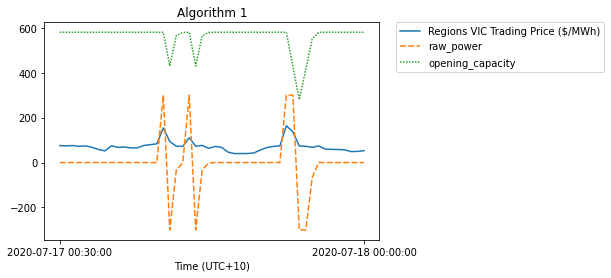

In [35]:
sns.lineplot(data=thetimereq)

plt.xticks([thetimereq.index.min(), thetimereq.index.max()],[thetimereq.index.min(), thetimereq.index.max()])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Algorithm 1')
plt.savefig("../../plots/algorithm1.png", bbox_inches = 'tight')

plt.show()

### Algorithm 2 

In [36]:
TIME = 'Time (UTC+10)'
GENERATION = 'Regions VIC Trading Total Intermittent Generation (MW)'
DEMAND = 'Regions VIC Operational Demand (MW)'
POWER = 300
CAPACITY = 580
CHARGE_EFF = 90
DISCHARGE_EFF = 90
MLF = 0.991
FIXED_OP = 8.1
VAR_OP = 0

In [37]:
victoria_df.head()

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),Time,Hour,Day
0,2018-01-01 00:00:00,90.43,146.87,4599,00:00:00,0,1
1,2018-01-01 00:30:00,92.46,131.68,4398,00:30:00,0,1
2,2018-01-01 01:00:00,87.62,119.98,4238,01:00:00,1,1
3,2018-01-01 01:30:00,73.08,123.86,4112,01:30:00,1,1
4,2018-01-01 02:00:00,70.18,132.72,3956,02:00:00,2,1


In [38]:
vic = victoria_df[[TIME, TRADING_PRICE, GENERATION, DEMAND]]

# Since the first date is at 00:00:00, the first period should be 48
period = [48]
x = 1
while x < len(vic):
    for i in range(48):
        period.append(i+1)
        x += 1

vic.insert(1, 'Period', period)

In [39]:
def first_cycle(spot_price):
    """ Returns first indexes of the first periods for the first cycles """
    
    max_price = 0
    min_price = 999999

    for i in range(48-6):
        """ Finds which 6 periods have the most sum and least sum 
            by going through 1 to 6, 2 to 7 and so on """

        curr = spot_price.iloc[i:i+6 ,0].sum()

        if curr < min_price:
            min_price = curr
            min_i = i  # Stores the first index of the max period

        if curr > max_price:

            max_price = curr
            max_i = i  # Stores the first index of the min period
            
    min_, max_ = store_index(min_i, max_i)
                
    return min_, max_

In [40]:
def sec_cycle(spot_price, min_index, max_index):
    """ Returns first indexes of the first periods for the second cycles """
    
    remaining = list(spot_price.index)
    sec_min_price = 999999
    sec_max_price = 0
    to_remove = min_index + max_index
    
    # remove all periods after max
    remaining = remaining[:remaining.index(to_remove[-1])+1]
    
    for index in to_remove:
        remaining.remove(index)

    for i in range(len(remaining) - 6):

        # make sure the next six indexes are increment of 1
        if remaining[i] == (remaining[i+5] - 5):

            curr_sum = spot_price.iloc[remaining[i]:remaining[i]+6 ,0].sum()

            if curr_sum < sec_min_price:
                sec_min_price = curr_sum
                sec_min_i = remaining[i]  # Stores the first index of the second max period

            if curr_sum > sec_max_price:

                sec_max_price = curr_sum
                sec_max_i = remaining[i]  # Stores the first index of the second min period
                
    min_, max_ = store_index(sec_min_i, sec_max_i)
    
    min_index += min_
    max_index += max_
                
    return min_index, max_index

In [41]:
def store_index(index1, index2):
    """ Store the rest of the max and min price indexes """
    list1 = []
    list2 = []
    for i in range(6):
        list1.append(index1 + i)
        list2.append(index2 + i)
        
    return list1, list2

In [42]:
def algorithm2(ori_df):
    """ Finds optimal charge and discharge period from the mean """
    
    spot_price = ori_df.groupby(['Period'])[[TRADING_PRICE]].mean()
    
    # First cycle
    min_index, max_index = first_cycle(spot_price)

    # Second cycle
    # Comment line 11 if only want one cycle
    min_index, max_index = sec_cycle(spot_price, min_index, max_index)

    # the charge and discharge period are fixed in Algorithm 2, +1 to get their periods
    charge_period = list(np.asarray(min_index) + 1)
    discharge_period = list(np.asarray(max_index) + 1)
    
    return charge_period, discharge_period, 

In [43]:
def create_df(ori_df):
    """ Returns a proper dataframe with columns needed """

    df = ori_df[[TIME, 'Period', TRADING_PRICE]]
    df['raw_power'] = 0
    df['dispatch'] = 0
    df['revenue'] = 0
    df['opening'] = 0
    df['closing'] = 0
    df['revenue'] = 0
    
    
    # I removed the first row because first row of vic is 00:00:00, 
    # which is the last period from the previous day
    df = df.drop([0], axis=0) 
    
    return df

In [44]:
def find_all(ori_df):
    """ Returns a completed dataframe """
    """ This is the main function, calling this function will automatically run all other functions """
    
    start = time.time()
    
    charge_period, discharge_period = algorithm2(ori_df)
    
    df = create_df(ori_df)
    
    for i in list(df.index):

        period = df.at[i, "Period"]
        price = df.at[i, TRADING_PRICE]

        """ Find Opening Cap """
        # Starts from 1 because the first row was removed
        if i != 1:
            df.at[i,"opening"] = df.at[i-1,"closing"]

        opening_cap = math.ceil(df.at[i, "opening"])




        """ Find raw_power """
        if period in charge_period:
            df.at[i, "raw_power"] = -math.floor(min(POWER,(CAPACITY-opening_cap)/(CHARGE_EFF/100)*2))

        elif period in discharge_period:
            df.at[i, "raw_power"] = math.floor(min(POWER,opening_cap/(DISCHARGE_EFF/100)*2))

        rawPower = df.at[i, "raw_power"]




        """ Find dispatch """
        if rawPower < 0:
            eff = 1

        else:
            eff = DISCHARGE_EFF / 100

        df.at[i,"dispatch"] = math.ceil(rawPower / 2 * eff)
        dispatch = df.at[i, "dispatch"]



        """ Find Closing Cap """
        if dispatch < 0:
            eff = CHARGE_EFF / 100

        else:
            eff = 100 / DISCHARGE_EFF

        df.at[i,"closing"] = math.ceil(max(0, min((opening_cap - (dispatch * eff)), CAPACITY)))



        """ Find revenue """
        if dispatch < 0:
            factor = 1/MLF

        else:
            factor = MLF

        df.at[i,"revenue"] = math.ceil(price * dispatch * factor)
        
    
    print("Total revenue in the dataset:", df["revenue"].sum())
    #print("Total days in the dataset:", len(df)/48)
    #print("Revenue per day:", df["revenue"].sum() / (len(df)/48))
    end = time.time()
    #print("Time Complexity for running the entire Algorithm 2: {time_taken}s".format(time_taken = end-start))
    
    return df

In [45]:
deliverable3 = vic[(vic[TIME] >= "2020-07-17 00:00:00") & (vic[TIME] < "2020-07-18 00:00:30")]
deliverable3 = deliverable3.reset_index(drop=True)
del3 = find_all(deliverable3)

Total revenue in the dataset: 44471


In [46]:
thetimereq = del3[['Time (UTC+10)','Regions VIC Trading Price ($/MWh)','raw_power','opening']]
thetimereq = thetimereq.set_index('Time (UTC+10)')

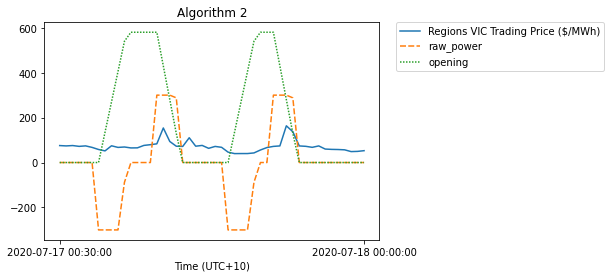

In [47]:
sns.lineplot(data = thetimereq)

plt.xticks([thetimereq.index.min(), thetimereq.index.max()],[thetimereq.index.min(), thetimereq.index.max()])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Algorithm 2')
plt.savefig("../../plots/algorithm2.png", bbox_inches = 'tight')

plt.show()

### Algorithm 3

In [48]:
DISCHARGING_LOOKAHEAD = 10

In [49]:
vic_price = victoria_df[['Time (UTC+10)',TRADING_PRICE]]
vic_price['charging_or_not'] = 0
vic_price['discharging_or_not'] = 0
vic_price['raw_power'] = 0
vic_price['market_dispatch'] = 0
vic_price['opening_capacity'] = 0
vic_price['closing_capacity'] = 0
vic_price['revenue'] = 0

In [50]:
# percentile.exc from excel != np.percentile (np.percentile == percentile.inc from excel)
# code taken from https://stackoverflow.com/questions/38596100/python-equivalent-of-excels-percentile-exc

def quantile_exc(ser, q):
    ser_sorted = ser.sort_values()
    rank = q * (len(ser) + 1) - 1
    assert rank > 0, 'quantile is too small'
    rank_l = int(rank)
    return ser_sorted.iat[rank_l] + (ser_sorted.iat[rank_l + 1] - ser_sorted.iat[rank_l]) * (rank - rank_l)

In [ ]:
start_time_charge = time.time()

for i in list(vic_price.index)[1:]:

    if((i+CHARGING_LOOKAHEAD+1) < len(vic_price)):
        
        thelist = vic_price.iloc[i+1:i+CHARGING_LOOKAHEAD+1][TRADING_PRICE]
        ser = pd.Series(thelist)

        
        if(quantile_exc(ser,0.25) < vic_price.at[i,TRADING_PRICE]):
            vic_price.at[i,'charging_or_not'] = 0
        else:
            vic_price.at[i,'charging_or_not'] = 1
            
            
        if(quantile_exc(ser,0.75) > vic_price.at[i,TRADING_PRICE]):
            vic_price.at[i,'discharging_or_not'] = 0
        else:
            vic_price.at[i,'discharging_or_not'] = 1
            
            
end_time_charge = time.time()
behavior_time = end_time_charge - start_time_charge

In [ ]:
start_time = time.time()


for i in list(vic_price.index)[1:]:
    
    
    # update opening capacity
    if(i != 0):
        vic_price.at[i, 'opening_capacity'] = vic_price.at[i-1, 'closing_capacity']
    
    
    # finding raw_power -- this uses the modified function Akira gave us in the last announcement
    if(vic_price.at[i,'charging_or_not'] == 1):
        vic_price.at[i,'raw_power'] = -1*min(BATTERY_POWER, 
                                           (BATTERY_CAPACITY-vic_price.at[i,'opening_capacity'])/EFFICIENCY*2)

    if(vic_price.at[i,'discharging_or_not'] == 1):
        vic_price.at[i,'raw_power'] = min(BATTERY_POWER, vic_price.at[i,'opening_capacity']/EFFICIENCY*2)
        
        
    # finding market_dispatch 
    if(vic_price.at[i,'raw_power'] < 0):
        vic_price.at[i,'market_dispatch'] = vic_price.at[i,'raw_power']/2
        
    else:
        # EFFICIENCY is already in decimal (0.9) so no need to divide by 100
        vic_price.at[i,'market_dispatch'] = vic_price.at[i,'raw_power']/2 * EFFICIENCY 
        
        
    # finidng closing_capacity   
    if(vic_price.at[i,'market_dispatch'] < 0):
        thecondition = vic_price.at[i,'opening_capacity'] - (vic_price.at[i,'market_dispatch'] * EFFICIENCY)
    else:
        thecondition = vic_price.at[i,'opening_capacity'] - (vic_price.at[i,'market_dispatch'] * (100/(EFFICIENCY*100)))
    
    vic_price.at[i,'closing_capacity'] = round(max(0, min(thecondition, BATTERY_CAPACITY)),0)
      
        
        
    #finding revenue        
    if(vic_price.at[i,'market_dispatch'] < 0):
        vic_price.at[i,'revenue'] = round(vic_price.at[i,'market_dispatch'] * vic_price.at[i,TRADING_PRICE] * (1/MARGINAL_LOSS_FACTOR),0)
    else:
        vic_price.at[i,'revenue'] = round(vic_price.at[i,'market_dispatch'] * vic_price.at[i,TRADING_PRICE] * MARGINAL_LOSS_FACTOR,0)


end_time = time.time()
loop_time = end_time - start_time

In [ ]:
thetime = vic_price.loc[(vic_price['Time (UTC+10)'] >= '2020-07-17 00:30:00') 
                      & (vic_price['Time (UTC+10)'] <= '2020-07-18 00:00:00')]
thetimereq = thetime[['Time (UTC+10)','Regions VIC Trading Price ($/MWh)','raw_power','opening_capacity']]
thetimereq = thetimereq.set_index('Time (UTC+10)')
print("Total revenue in the dataset:", sum(thetime['revenue']))

In [ ]:
sns.lineplot(data=thetimereq)

plt.xticks([thetime['Time (UTC+10)'].min(), thetime['Time (UTC+10)'].max()],[thetime['Time (UTC+10)'].min(), thetime['Time (UTC+10)'].max()])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Algorithm 3')
plt.savefig("../../plots/algorithm3.png", bbox_inches = 'tight')

plt.show()

<b> Comparing all 3 algorithms </b> <br>
Revenues:
<ul>
<li> Algorithm 1: AUD\$ 23,475 </li>
<li> Algorithm 2: AUD\$ 44,471 </li>
<li> Algorithm 3: AUD\$ 49,239 </li>
</ul>

** For deliverable 3 (17 - 18th July 2020)